In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sports_teams = {
                  'mens_swimming': ['https://csidolphins.com/sports/mens-swimming-and-diving/roster/2023-2024?view=2', 'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster?view=2','https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster?view=2','https://johnjayathletics.com/sports/mens-volleyball/roster?view=2','https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster?view=2','https://mecathletics.com/sports/mens-volleyball/roster?view=2','https://www.huntercollegeathletics.com/sports/mens-volleyball/roster?view=2','https://yorkathletics.com/sports/mens-volleyball/roster?view=2','https://ballstatesports.com/sports/mens-volleyball/roster?view=2'],
                  'mens_volleyball': ['https://ccnyathletics.com/sports/mens-volleyball/roster?view=2', 'https://lehmanathletics.com/sports/mens-volleyball/roster?view=2','https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster?view=2','https://johnjayathletics.com/sports/mens-volleyball/roster?view=2','https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster?view=2','https://mecathletics.com/sports/mens-volleyball/roster?view=2','https://www.huntercollegeathletics.com/sports/mens-volleyball/roster?view=2','https://yorkathletics.com/sports/mens-volleyball/roster','https://ballstatesports.com/sports/mens-volleyball/roster?view=2',],
                  'womens_volleyball': ['https://bronxbroncos.com/sports/womens-volleyball/roster/2021?view=2','https://queensknights.com/sports/womens-volleyball/roster?view=2','https://augustajags.com/sports/wvball/roster?view=2','https://flaglerathletics.com/sports/womens-volleyball/roster?view=2','https://pacersports.com/sports/womens-volleyball/roster?view=2','https://www.golhu.com/sports/womens-volleyball/roster?view=2'],
                  'womens_swimming': ['https://yorkathletics.com/sports/womens-swimming-and-diving/roster','https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim','https://mckbearcats.com/sports/womens-swimming-and-diving/roster','https://ramapoathletics.com/sports/womens-swimming-and-diving/roster','https://keanathletics.com/sports/womens-swimming-and-diving/roster']
                }

In [ ]:
def average_height(url_list):

  # list to store heights
  heights = []
  names = []

  # vist each url in the list
  for url in url_list:

    # headers Source: https://www.zenrows.com/blog/web-scraping-headers#user-agent
    headers = {
      'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
      'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
      'Accept-Language': 'en-US,en;q=0.9',
      'Connection': 'keep-alive'
      }

    # making a request to the server
    page = requests.get(url, headers=headers)

    # scrape data only if connection is successful
    if page.status_code == 200:
      # import the raw html into BeautifulSoup
      soup = BeautifulSoup(page.content, 'html.parser')

      # find all td tags with a class of height
      raw_heights = soup.find_all('td', class_ ='height')


      # find all td tags with a class of sidearm-table-player-name
      name_tags = soup.find_all('td', class_ ='sidearm-table-player-name')

      # extracting the name from the name tags
      for name_tag in name_tags:
        names.append(name_tag.get_text().strip())

      # extract the raw height from the list
      for raw_height in raw_heights:
        x = raw_height.get_text()
        # splitting the string by the '-'
        feet = float(x.split('-')[0]) * 12
        inches = float(x.split('-')[1])

        # converting height to inches
        height_inches = feet + inches

        heights.append(height_inches)


  # organized the data as a dictionary
  data = {
      'Name': names,
      'Height': heights
  }

  df = pd.DataFrame(data)
  return df


In [ ]:
mens_swim_df = average_height(sports_teams['mens_swimming'])
mens_swim_df
# shows the mens swimming into a dataframe

,Name,Height
0,Anthony Attenborough,70.0
1,James Curran,69.0
2,Charles Cusumano,64.0
3,David Fayngersh,70.0
4,Michael Graham,70.0
...,...,...
111,George Molina,72.0
112,Stanley Sanchez,68.0
113,Sebastian Gomez,76.0
114,"David Heyliger, Jr.",73.0


In [ ]:
mens_volley_df = average_height(sports_teams['mens_volleyball'])
mens_volley_df

,Name,Height
0,Shakib Delowar,71.0
1,Brandon Green,72.0
2,Reng Chen,69.0
3,Anirudha Das,68.0
4,Gabriel Linus,75.0
...,...,...
98,George Molina,72.0
99,Stanley Sanchez,68.0
100,Sebastian Gomez,76.0
101,"David Heyliger, Jr.",73.0


In [ ]:
womens_volley_df = average_height(sports_teams['womens_volleyball'])
womens_volley_df

,Name,Height
0,Maynee De Los Santos,64.0
1,Emely Nunez,66.0
2,Kiana Castillo,70.0
3,Breanna Kimbrough,69.0
4,Zouera Sofiani,65.0
...,...,...
92,Erin Ferello,65.0
93,Alyssa Daley,75.0
94,Myka Costanzo,64.0
95,Kyleigh McDermit,71.0


In [ ]:
womens_swimming_df = average_height(sports_teams['womens_swimming'])
womens_swimming_df

,Name,Height
0,Nakia Usher,58.0
1,Julia Wyman,58.0
2,Scarlet Astudillo,64.0
3,Joscelyn Galindo,63.0
4,Dea Gazheli,63.0
...,...,...
58,Vivian Ravines,68.0
59,Faith Ring,63.0
60,Sydney Stemley,66.0
61,Braelyn Wilson,65.0


In [ ]:
top_heights = mens_swim_df['Height'].nlargest(5).unique()
fifth_height = top_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
mens_swim_df[mens_swim_df['Height'] >= fifth_height]

,Name,Height
51,Jason Lin,77.0
53,Joaquin Calderon,80.0
69,Adam Bainey,77.0
83,Haoxin Hu,77.0
87,Wyatt Kotuk,78.0
101,Annes Deljanin,79.0
103,Jon Pflueger,77.0


In [ ]:
top_heights = mens_volley_df['Height'].nlargest(5).unique()
fifth_height = top_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
mens_volley_df[mens_volley_df['Height'] >= fifth_height]

,Name,Height
38,Jason Lin,77.0
40,Joaquin Calderon,80.0
56,Adam Bainey,77.0
70,Haoxin Hu,77.0
74,Wyatt Kotuk,78.0
88,Annes Deljanin,79.0
90,Jon Pflueger,77.0


In [ ]:
top_heights = womens_volley_df['Height'].nlargest(5).unique()
fifth_height = top_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
womens_volley_df[womens_volley_df['Height'] >= fifth_height]

,Name,Height
24,Maya Angelova,75.0
30,Sophia Kruczko,75.0
35,Madelyn Eden,74.0
37,Marin Freeland,74.0
50,Molly Boyd,75.0
62,Avery Pearson,74.0
93,Alyssa Daley,75.0


In [ ]:
top_heights = womens_swimming_df['Height'].nlargest(5).unique()
fifth_height = top_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
womens_swimming_df[womens_swimming_df['Height'] >= fifth_height]

,Name,Height
13,Bianka Bukovics,71.0
17,McKenzie Fazio,74.0
22,Presley Heitzmann,71.0
30,Karley Sonnenberg,70.0
33,Jocelyn Zgola,70.0
36,Isabella Hanson,70.0
39,Grace Korey,70.0
52,Grace Geyer,71.0


In [ ]:
shortest_heights = mens_swim_df['Height'].nsmallest(5).unique()
fifth_height = shortest_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
mens_swim_df[mens_swim_df['Height'] <= fifth_height]

,Name,Height
2,Charles Cusumano,64.0
27,Samuel Liao,65.0
29,Eric Mayzlin,65.0
38,Stuart Xu,65.0
41,Dion Csikortos,65.0


In [ ]:
shortest_heights = mens_volley_df['Height'].nsmallest(5).unique()
fifth_height = shortest_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
mens_volley_df[mens_volley_df['Height'] <= fifth_height]

,Name,Height
16,Levi Rosario,64.0
18,Joseph Gianfranco Teves,65.0
28,Dion Csikortos,65.0
34,Ali Zandani,66.0
42,Eugene Villarruz,66.0
75,Crisostomo Ibarra,66.0


In [ ]:
shortest_heights = womens_volley_df['Height'].nsmallest(5).unique()
fifth_height = shortest_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
womens_volley_df[womens_volley_df['Height'] <= fifth_height]

,Name,Height
12,Nourhan Hadjeb,61.0
23,Sarah Munn,63.0
27,Giulia Rodrigues,63.0
34,Libby Nickels,61.0
71,Ella Hukel,63.0
78,Kaitlyn Houck,63.0
82,Salma Villa Morales,62.0


In [ ]:
shortest_heights = womens_swimming_df['Height'].nsmallest(5).unique()
fifth_height = shortest_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
womens_swimming_df[womens_swimming_df['Height'] <= fifth_height]

,Name,Height
0,Nakia Usher,58.0
1,Julia Wyman,58.0
5,Amanda Lee,61.0
40,Camila Mercado,61.0
41,Valeria Pages,61.0
53,Taylor Jacobson,61.0


In [ ]:
mens_swim_df.describe()

,Height
count,116.000000
mean,70.775862
std,3.344265
min,64.000000
25%,68.000000
50%,70.000000
75%,73.000000
max,80.000000


In [ ]:
mens_volley_df.describe()

,Height
count,103.000000
mean,71.213592
std,3.446085
min,64.000000
25%,68.500000
50%,71.000000
75%,74.000000
max,80.000000


In [ ]:
womens_volley_df.describe()

,Height
count,97.000000
mean,68.762887
std,3.390468
min,61.000000
25%,66.000000
50%,69.000000
75%,71.000000
max,75.000000


In [ ]:
womens_swimming_df.describe()

,Height
count,63.000000
mean,65.507937
std,3.301383
min,58.000000
25%,63.000000
50%,65.000000
75%,68.000000
max,74.000000


In [ ]:
mens_swim_avg = mens_swim_df['Height'].mean()
print(f'The avg height of the mens swimming team is {mens_swim_avg}')

The avg height of the mens swimming team is 70.77586206896552


In [ ]:
mens_volley_avg = mens_volley_df['Height'].mean()
print(f'The avg height of the mens volleyball  team is {mens_volley_avg}')

The avg height of the mens volleyball  team is 71.2135922330097


In [ ]:
womens_volley_avg = womens_volley_df['Height'].mean()
print(f'The avg height of the womens volley team is {womens_volley_avg}')

The avg height of the womens volley team is 68.76288659793815


In [ ]:
womens_swimming_avg = womens_swimming_df['Height'].mean()
print(f'The avg height of the womens swimming team is {womens_swimming_avg}')

The avg height of the womens swimming team is 65.5079365079365


In [ ]:
avg_data = {
              'Team' : ['Mens Swim Team' , 'Mens Volleyball Team','Womens Swim Team','Womens Volleyball Team'],
              'Avg Height' : [mens_swim_avg , mens_volley_avg, womens_swimming_avg, womens_volley_avg]
          }

# convert dictionary to dataframe

avg_data_df = pd.DataFrame(avg_data)
avg_data_df

,Team,Avg Height
0,Mens Swim Team,70.775862
1,Mens Volleyball Team,71.213592
2,Womens Swim Team,65.507937
3,Womens Volleyball Team,68.762887


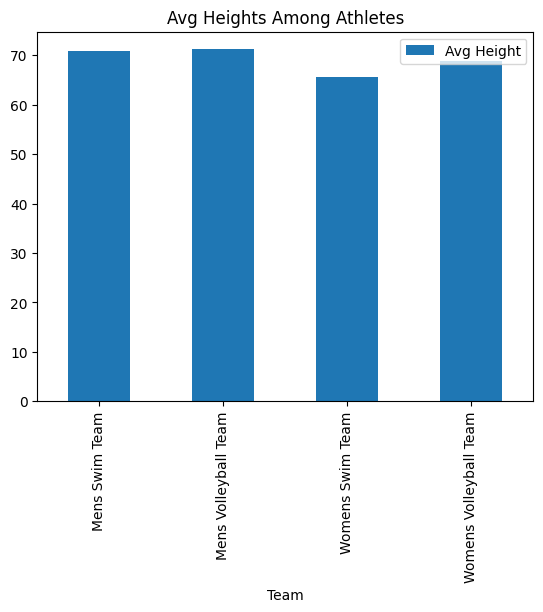

In [ ]:
avg_data_df.plot.bar(x='Team', y = 'Avg Height', title='Avg Heights Among Athletes')
plt.show()